# Voice Quality Analyzer

### Импортируем нужные модули

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pydub.generators import Sine
from pydub import AudioSegment

In [3]:
from tempfile import NamedTemporaryFile
import os

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Создаем две синусоиды з частотами 300Hz и 600Hz

In [5]:
sine_wave_300 = Sine(freq=300)
sine_wave_600 = Sine(freq=600)

### Можем прослушать полученный "звук"

#### Волна с частотой 300Hz

In [6]:
audio_segment_sine_wave_300 = sine_wave_300.to_audio_segment(duration=1000.0*5)
audio_segment_sine_wave_300

#### Волна с частотой 600Hz

In [7]:
audio_segment_sine_wave_600 = sine_wave_600.to_audio_segment(duration=1000.0*5)
audio_segment_sine_wave_600

### Реализуем функцию для генерации комбинации двух синусоид (а так же общий случай для множества входных синусоид)

In [8]:
def gen_comb_of_two_sine(first_sine=Sine(freq=300), second_sine=Sine(freq=600), first_duration=1000, second_duration=1000, export_in_wav=False, filename='output/Custom signal generator output/combination_of_two_sine.wav'):
    """
    Parameters:
        first_sine: pydub.generators.Sine, default: Sine(freq=300)
            This is first sine wave.
            
        second_sine: pydub.generators.Sine, default: Sine(freq=600)
            This is first sine wave.
            
        first_duration: int, float, default: 1000 ms
            Audio duration in seconds.
            
        second_duration: int, float, default: 1000 ms
            Audio duration in seconds.
            
        export_in_wav: bool, , default: False
            This variable specifies whether
            combination_of_two_sine should be saved in .wav file.
            
        filename: str, default: combination_of_two_sine.wav
            This is name of output file.
            
    Returns:
        combination_of_two_sine: pydub.audio_segment.AudioSegment
            This is combination of two sine wave.
            
    """
    
    
    audio_segment_first = first_sine.to_audio_segment(duration=np.abs(first_duration))
    audio_segment_second = second_sine.to_audio_segment(duration=np.abs(second_duration))
    
    combination_of_two_sine = audio_segment_first + audio_segment_second
    
    if export_in_wav:
        path = filename.rsplit(sep='/', maxsplit=1)[0]
        if not os.path.exists(path):
            os.makedirs(path)
        combination_of_two_sine.export(filename, format=filename.split('.')[-1])
        
    return combination_of_two_sine

In [9]:
def gen_comb_of_sine(*args, export_in_wav=False, filename='output/Custom signal generator output/combination_of_sines.wav'):
    """
    Parameters:
        *args containes tuples pair like (Sine, duration).
        
        Sine: pydub.generators.Sine
            This is one of sine waves.
            
        duration: int, float
            This is duration of current sine wave.
            
        export_in_wav: bool, default: False
            This variable specifies whether
            combination_of_sines should be saved in .wav file.
            
        filename: str, default: combination_of_sines.wav
            This is name of output file.
            
    Returns:
        combination_of_sines: pydub.audio_segment.AudioSegment
            This is combination of sine waves.
            
    """
    combination_of_sines = AudioSegment.empty()
    for i in args:
        combination_of_sines += i[0].to_audio_segment(duration=np.abs(i[1]))
        
    if export_in_wav:
        path = filename.rsplit(sep='/', maxsplit=1)[0]
        if not os.path.exists(path):
            os.makedirs(path)
        combination_of_sines.export(filename, format=filename.split('.')[-1])
        
    return combination_of_sines

#### Результат роботы функции для генерации комбинации двух волн

In [10]:
gen_comb_of_two_sine(export_in_wav=True)

In [11]:
gen_comb_of_two_sine(first_sine=Sine(50), second_sine=Sine(75), second_duration=5000, first_duration=5000, export_in_wav=True)

#### Результат роботы функции для генерации комбинации множества волн

In [12]:
gen_comb_of_sine((Sine(300), 1000), (Sine(600), 1000), (Sine(300), 1000), export_in_wav=True)

### Реализуем функцию для генерации звуковой дорожки определенной длинный и формата

#### Импортируем аудио-книгну

In [13]:
audio_book_mp3 = AudioSegment.from_file("input/audiobook.mp3", format='mp3')

In [14]:
audio_book_mp3 = audio_book_mp3.set_channels(1)

#### Функция генерации выходного файла определенной длинный и формата

In [15]:
def voice_signal_generator(audio, duration=1000*2*60, filename='output/Voice signal generator output/output.wav'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is input audio file.
            
        duration: int, float, default: 1000*2*60 ms
            This is duration of output audio file.
            
        filename: str, default: output.wav
            This is name of output file.
            
    """
    audio_slice = None
    if len(audio) < duration + 1:
        audio_slice = audio
    else:
        bound = np.random.randint(low=0, high=len(audio)-duration-1)
        audio_slice = audio[bound:bound+duration]
        
    path = filename.rsplit(sep='/', maxsplit=1)[0]
    if not os.path.exists(path):
        os.makedirs(path)
        
    audio_slice.export(filename, format=filename.split('.')[-1])

In [16]:
voice_signal_generator(audio_book_mp3)

#### Откроем полученный файл и прослушаем результат

In [17]:
audio_book_output = AudioSegment.from_file("output/Voice signal generator output/output.wav", format='wav')

In [18]:
audio_book_output

#### Построим график для файла output.wav на интервале от 0:01:000 до 0:01:050 секунд

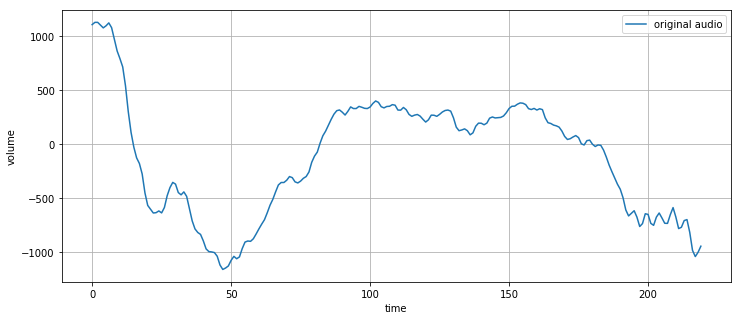

In [19]:
plt.figure(figsize=(12,5))

plt.plot(audio_book_output[1000:1005].get_array_of_samples(), label='original audio')

plt.xlabel('time')
plt.ylabel('volume')
plt.grid()
plt.legend()

### Реализуем функцию, которая будет трансформировать входной файл wav-файл в 64Kbps *.mp3, а потом обратно в *.wav

In [20]:
def signal_transformer(audio, filename='output/Sound transformer output/output_transform.wav', bitrate='64k'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is input audio file.
            
        filename: str, default: output_transform.wav
            This is name of output file.
            
        bitrate: str, default: '64k'
            This is bitrate of output file.
            
    """
    # temp = None
    with NamedTemporaryFile(mode='w+b', suffix='.mp3', delete=True) as f:
        # temp = f.name
        audio.export(f, format='mp3', bitrate=bitrate)
        to_wav = AudioSegment.from_mp3(f)
        
        path = filename.rsplit(sep='/', maxsplit=1)[0]
        if not os.path.exists(path):
            os.makedirs(path)
            
        to_wav.export(filename, format=filename.split('.')[-1])
    # print(f.name)
    # os.remove(temp)

#### Применим эту функцию для полученной дорожки с прошлого пункта

In [21]:
signal_transformer(audio_book_output, bitrate='16k')

#### Откроем полученный файл и прослушаем результат

In [22]:
audio_book_output_transform = AudioSegment.from_file("output/Sound transformer output/output_transform.wav", format='wav')

In [23]:
audio_book_output_transform

+ Заметно, что качество звука стало чуть хуже

#### Построим график для файла output_transform.wav на интервале от 0:01:000 до 0:01:050 секунд

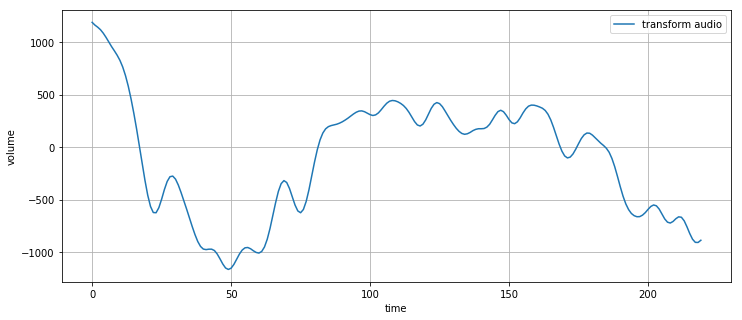

In [24]:
plt.figure(figsize=(12,5))

plt.plot(audio_book_output_transform[1000:1005].get_array_of_samples(), label='transform audio')

plt.xlabel('time')
plt.ylabel('volume')
plt.grid()
plt.legend()

#### Построим график с наложением звука до превращения и после на интервале от 0:01:000 до 0:01:050 секунд

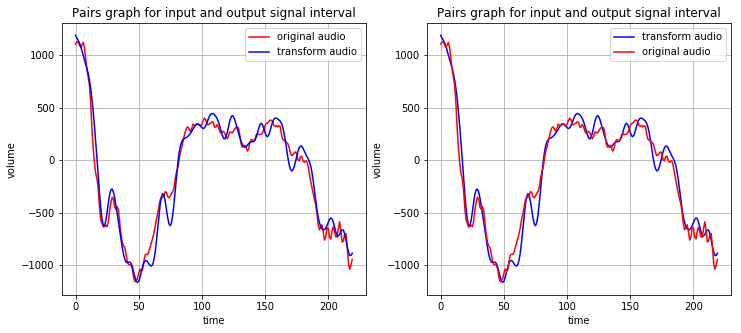

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(audio_book_output[1000:1005].get_array_of_samples(), color='red', label='original audio')
ax1.plot(audio_book_output_transform[1000:1005].get_array_of_samples(), color='blue', label='transform audio')
ax1.set_xlabel('time')
ax1.set_ylabel('volume')
ax1.set_title('Pairs graph for input and output signal interval')
ax1.grid()
ax1.legend()

ax2.plot(audio_book_output_transform[1000:1005].get_array_of_samples(), color='blue', label='transform audio')
ax2.plot(audio_book_output[1000:1005].get_array_of_samples(), color='red', label='original audio')
ax2.set_xlabel('time')
ax2.set_ylabel('volume')
ax2.set_title('Pairs graph for input and output signal interval')
ax2.grid()
ax2.legend()

+ Видно, что график слегка преобразился (изменилось положение локальных пиков)

### Добавление шума в модель

#### Аддитивный шум: гауссовский (AWGN)

In [26]:
def add_awgn(audio, start=0, duration=1000*5, loc=0.0, scale=1.0, filename='output/Communication channel model/output_awgn.wav'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is input audio file.
            
        start: int, float, default: 0 ms
            This is start of AWGN.
            
        duration: int, float, default: 1000*2*60 ms
            This is duration of AWGN.
            
        loc: float, default: 0.0
            Mean ("centre") of the distribution.
            
        scale: float, default: 1.0
            Standard deviation (spread or "width") of the distribution.
            
        filename: str, default: output_awgn.wav
            This is name of output file.
            
        Return:
            Output audio file with AWGN.
    """
    length = len(audio)
    if length < start + duration + 1:
        duration = length - start - 1
    
    normal_noise = np.int16(np.random.normal(loc=loc, scale=scale, size=len(audio[start:start + duration].get_array_of_samples())))
    
    output_array = np.array(audio.get_array_of_samples())
    
    left_bound = int((start / 1000) * (audio.frame_rate) * (audio.frame_width / audio.sample_width))
    right_bound = len(audio[start:(start + duration)].get_array_of_samples())
    
    output_array[left_bound:left_bound + right_bound] += normal_noise
    
    output_audio = AudioSegment(data=output_array.tobytes(),
                                sample_width=audio.sample_width,
                                frame_rate=audio.frame_rate,
                                channels=audio.channels)
    
    path = filename.rsplit(sep='/', maxsplit=1)[0]
    if not os.path.exists(path):
        os.makedirs(path)
    
    output_audio.export(filename, format=filename.split('.')[-1])
    
    return output_audio

In [27]:
sound_with_awgn = add_awgn(audio_book_output_transform, start=1000, duration=2000, scale=100)

In [28]:
sound_with_awgn

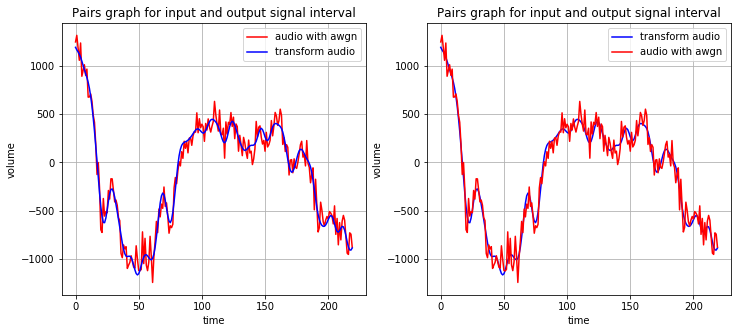

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(sound_with_awgn[1000:1005].get_array_of_samples(), color='red', label='audio with awgn')
ax1.plot(audio_book_output_transform[1000:1005].get_array_of_samples(), color='blue', label='transform audio')
ax1.set_xlabel('time')
ax1.set_ylabel('volume')
ax1.set_title('Pairs graph for input and output signal interval')
ax1.grid()
ax1.legend()

ax2.plot(audio_book_output_transform[1000:1005].get_array_of_samples(), color='blue', label='transform audio')
ax2.plot(sound_with_awgn[1000:1005].get_array_of_samples(), color='red', label='audio with awgn')
ax2.set_xlabel('time')
ax2.set_ylabel('volume')
ax2.set_title('Pairs graph for input and output signal interval')
ax2.grid()
ax2.legend()

#### Случайные подавления (occasional mutes)

In [30]:
def add_mute(audio, start=0, duration=1000*5, filename='output/Communication channel model/output_mute.wav'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is input audio file.
            
        start: int, float, default: 0 ms
            This is start of occasional mute.
            
        duration: int, float, default: 1000*2*60 ms
            This is duration of occasional mute.
            
        filename: str, default: output_mute.wav
            This is name of output file.
            
        Return:
            Output audio file with occasional mutes.
    """
    length = len(audio)
    if length < start + duration + 1:
        duration = length - start - 1
    
    mutes = np.zeros(shape=len(audio[start:start + duration].get_array_of_samples()), dtype=np.int16)
    
    output_array = np.array(audio.get_array_of_samples())
    
    left_bound = int((start / 1000) * (audio.frame_rate) * (audio.frame_width / audio.sample_width))
    right_bound = len(audio[start:(start + duration)].get_array_of_samples())
    
    output_array[left_bound:left_bound + right_bound] = mutes
    
    output_audio = AudioSegment(data=output_array.tobytes(),
                                sample_width=audio.sample_width,
                                frame_rate=audio.frame_rate,
                                channels=audio.channels)
    
    path = filename.rsplit(sep='/', maxsplit=1)[0]
    if not os.path.exists(path):
        os.makedirs(path)
    
    output_audio.export(filename, format=filename.split('.')[-1])
    
    return output_audio

In [31]:
sound_with_mute = add_mute(audio_book_output_transform, start=1000, duration=2000)

In [32]:
sound_with_mute

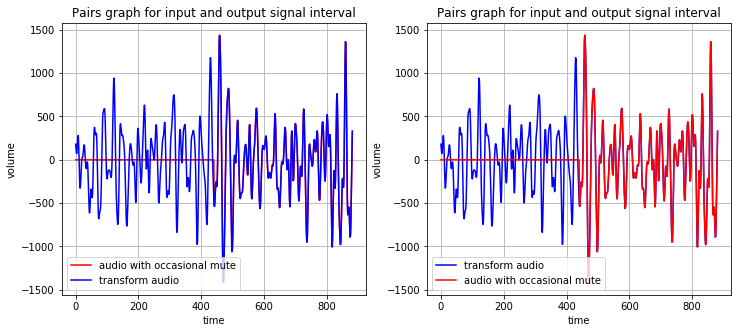

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(sound_with_mute[2990:3010].get_array_of_samples(), color='red', label='audio with occasional mute')
ax1.plot(audio_book_output_transform[2990:3010].get_array_of_samples(), color='blue', label='transform audio')
ax1.set_xlabel('time')
ax1.set_ylabel('volume')
ax1.set_title('Pairs graph for input and output signal interval')
ax1.grid()
ax1.legend()

ax2.plot(audio_book_output_transform[2990:3010].get_array_of_samples(), color='blue', label='transform audio')
ax2.plot(sound_with_mute[2990:3010].get_array_of_samples(), color='red', label='audio with occasional mute')
ax2.set_xlabel('time')
ax2.set_ylabel('volume')
ax2.set_title('Pairs graph for input and output signal interval')
ax2.grid()
ax2.legend()

#### Occasional distortion

In [34]:
def ampl_to_db(amplitude):
    return 20 * np.log10(np.abs(amplitude))

In [35]:
def add_distortion(audio, start=0, duration=1000*5, amplitude=100, filename='output/Communication channel model/output_distortion.wav', plot=False):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is input audio file.
            
        start: int, float, default: 0 ms
            This is start of occasional distortion.
            
        duration: int, float, default: 1000*2*60 ms
            This is duration of occasional distortion.
            
        amplitude: int, float, default: 100
            Max value of amplitude.
            
        filename: str, default: output_distortion.wav
            This is name of output file.
            
        plot: bool, default: False
            This variable specifies whether graphs should be drawn.
            
        Return:
            Output audio file with occasional distortion.
    """
    length = len(audio)
    if length < start + duration + 1:
        duration = length - start - 1
    
    samples = audio[start:start + duration].get_array_of_samples()
    n = len(samples)
    
    amplitude *= (n / 2.0)
    
    rfft = np.fft.rfft(samples)
    freq = np.fft.rfftfreq(n, d=1/audio.frame_rate)
    
    procces_rfft = np.array([x if np.abs(x) < amplitude else amplitude for x in rfft])
    # print(procces_rfft)
    
    irfft = np.fft.irfft(procces_rfft)
    
    output_array = np.array(audio.get_array_of_samples())
    
    left_bound = int((start / 1000) * (audio.frame_rate) * (audio.frame_width / audio.sample_width))
    # print(left_bound)
    # print(audio.frame_count(start))
    
    output_array[left_bound:left_bound + n] = irfft
    
    output_audio = AudioSegment(data=output_array.tobytes(),
                                sample_width=audio.sample_width,
                                frame_rate=audio.frame_rate,
                                channels=audio.channels)
    
    path = filename.rsplit(sep='/', maxsplit=1)[0]
    if not os.path.exists(path):
        os.makedirs(path)
    
    output_audio.export(filename, format=filename.split('.')[-1])
    
    if(plot):
        fig, ax = plt.subplots(2, 2, figsize=(20,10))
        
        ax[0][0].plot(freq, ((2.0 * np.abs(rfft)) / n), color='blue', label='Original plot')
        ax[0][0].plot(freq, ((2.0 * np.abs(procces_rfft)) / n), color='red', label='Plot with distortion, where max amplitude = %.1f' % float(2 * amplitude / n))
        ax[0][0].set_ylabel('amplitude (rfft)')
        ax[0][0].set_xlabel('frequency (freq)')
        ax[0][0].set_title('RFFT plot')
        ax[0][0].set_xlim(0, 5000)
        ax[0][0].legend()
        ax[0][0].grid()
        
        ax[1][0].plot(irfft, color='blue', label='Signal with distortion')
        ax[1][0].plot(samples, color='red', label='Original signal')
        ax[1][0].set_xlabel('time')
        ax[1][0].set_ylabel('amplitude (irfft)')
        ax[1][0].set_title('IRFFT plot')
        ax[1][0].legend()
        ax[1][0].grid()
        
        ax[1][1].plot(samples, color='red', label='Original signal')
        ax[1][1].plot(irfft, color='blue', label='Signal with distortion')
        ax[1][1].set_xlabel('time')
        ax[1][1].set_ylabel('amplitude (irfft)')
        ax[1][1].set_title('IRFFT plot')
        ax[1][1].legend()
        ax[1][1].grid()
        
    return output_audio

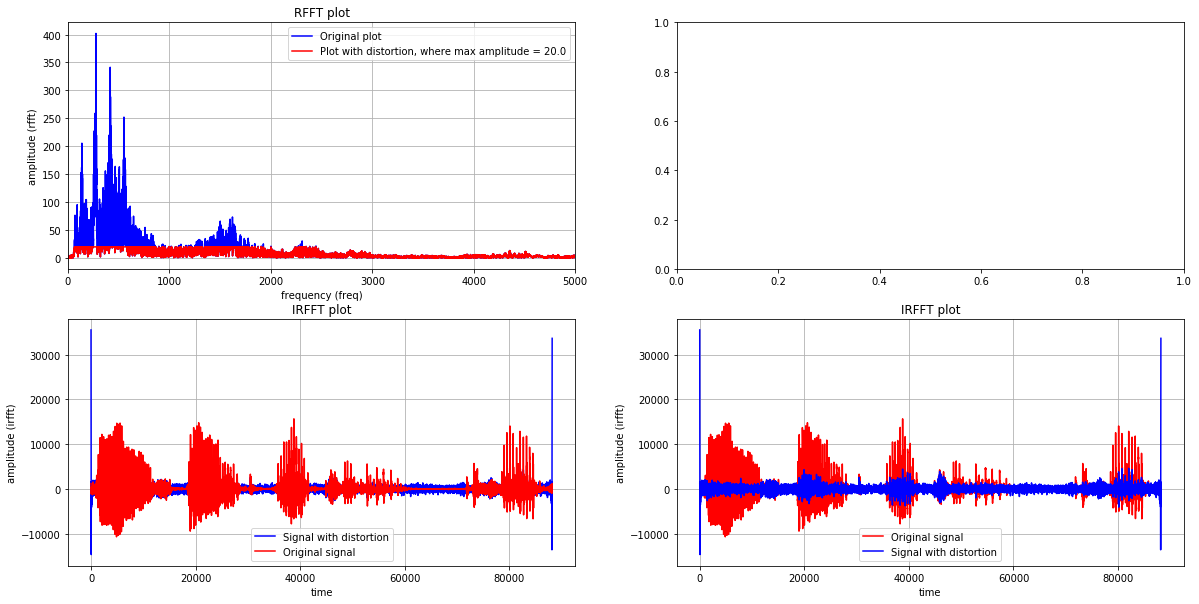

In [36]:
sound_with_distortion = add_distortion(audio_book_output_transform, start=1000, duration=2000, amplitude=20, plot=True)

In [37]:
sound_with_distortion

### Построение детектора искажений в звуковом сигнале

#### Двухчастотный сигнал

In [38]:
two_freq = gen_comb_of_two_sine(first_duration=1000*60, second_duration=1000*60,
                                filename='output/Blind 2-freq detection/Original_2_freq.wav',
                                export_in_wav=True)
two_freq

#### Визуализируем полученый сигнал

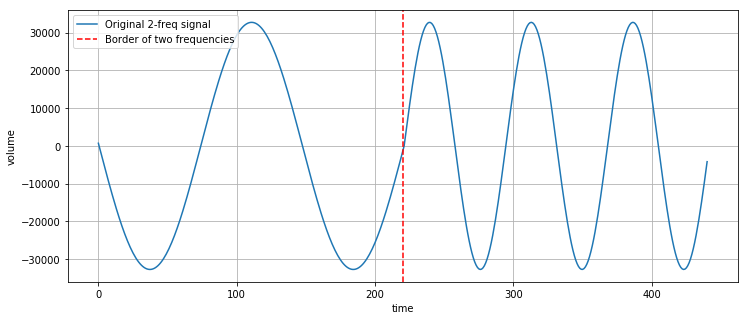

In [161]:
plt.figure(figsize=(12,5))

plt.plot(two_freq[1000*60-5:1000*60+5].get_array_of_samples(), label='Original 2-freq signal')
plt.axvline(len(two_freq[1000*60-5:1000*60+5].get_array_of_samples())//2, color='red', ls='--', label='Border of two frequencies')

plt.xlabel('time')
plt.ylabel('volume')
plt.grid()
plt.legend()

#### Слепой поиск мьютов

In [40]:
def power(samples):
    """
    Подсчет мощности спектра
    """
    if type(samples) == list:
        samples = np.array(samples)
    return np.sqrt(np.sum(samples**2))

In [322]:
def check_prev(means, key, delta):
    """
    Смотрю на убывание речи перед возможным мьютом
    """
    if key - delta < 0:
        return True
    else:
        for k in range(key-delta,key):
#             print(means[k], means[k + 1])
            if means[k] < means[k + 1]:
                return False
    return True

In [323]:
def compute_means(power_dict, width=5):
    """
    Подсчет скользящим окном средних значений
    """
    mean_prev = {}
    for key in power_dict.keys():
        temp = 0
        for i in range(width):
            try:
                temp += power_dict[key+i]
            except:
                break
        temp /= width
        mean_prev[key] = temp
        # print('index ', key, ' || mean', temp)
        
    return mean_prev

In [324]:
def blind_mute_detection(audio, min_mute=1000, alpha=0.05, step=100, delta=5, print_log=False):
    samples = np.array(audio.get_array_of_samples())
    duration = len(audio)
    n = len(samples)
    
    power_dict = {}
    mute_idx_list = []
    
    # в данном цикле находим мощности спектра
    # на каждом интервале заданой длинны step
    for idx, interval in enumerate(range(0, duration, step)):
        # print(interval)
        curr_audio = audio[interval:interval+step]
        curr_samples = np.array(curr_audio.get_array_of_samples())
        curr_n = len(curr_samples)
        
        curr_rfft = np.fft.rfft(curr_samples)
        
        power_dict[idx] = power(2.0 * abs(curr_rfft) / curr_n)
    
    # медианная мощность спектра
    m_pow = np.median(list(power_dict.values()))
    print('M_power = ', m_pow)
#     print(list(power_dict.values()))
#     pl = []
#     for i in range(69500,69700):
#         print('power[' + str(i) + ']' + ' = ' + str(power_dict[i]))
#         pl.append(power_dict[i])
        
#     plt.plot(pl)
    
    means = compute_means(power_dict=power_dict, width=5)
#     print(len(means))
#     print(len(power_dict))
    
    # поиск сегментов, которые подходят под
    # критерий определения мьюта в сигнале
    for key, val in power_dict.items():
        #print(val)
        if (val <= alpha * m_pow):
            mute_idx_list.append(key)
            if print_log:
                print('Index: {} || interval: [{};{}]'.format(key, key*step, (key + 1)*step))
    # print(power_dict)
    # print(mute_idx_list)
    
    all_mute = []
    
    if len(mute_idx_list) == 0:
        print('mute_idx_list length = 0')
        return all_mute
    
    # нахождение всех мьютов
    first_i = mute_idx_list[0]
    last_i = mute_idx_list[0]
    count = step
    for i in mute_idx_list[1:]:
        if last_i == i-1:
            count += step
            last_i = i
        else:
            if (count >= min_mute and check_prev(means, first_i, delta)):
                all_mute.append((first_i * step, (last_i+1) * step))
            first_i = i
            last_i = i
            count = step
            
        if i == mute_idx_list[-1] and (count >= min_mute) and check_prev(means, first_i, delta):
            all_mute.append((first_i * step, (last_i+1) * step))
        
    print('Length:', len(all_mute))
    return all_mute

#### Тест критерия слепого поиска мьютов

In [325]:
blind_mute_detection(two_freq, print_log=False)

M_power =  32766.3614192
mute_idx_list length = 0


[]

In [326]:
two_freq_with_mute = add_mute(two_freq, start=1000, duration=2000)

In [327]:
two_freq_with_mute = add_mute(two_freq_with_mute, start=6000, duration=2000)

In [328]:
two_freq_with_mute = add_mute(two_freq_with_mute, start=4000, duration=999)

In [331]:
blind_mute_detection(two_freq_with_mute, step=10, print_log=False)

M_power =  32766.3614192
Length: 2


[(1000, 3000), (6000, 8000)]

In [332]:
blind_mute_detection(two_freq_with_mute, step=100, print_log=False)

M_power =  32766.3614192
Length: 2


[(1000, 3000), (6000, 8000)]

In [333]:
blind_mute_detection(sound_with_mute, step=10, print_log=False)

M_power =  531.412635476
Length: 1


[(1000, 3000)]

In [342]:
blind_mute_detection(sound_with_mute, step=50, print_log=False)

M_power =  719.237762441
Length: 1


[(1000, 3000)]

In [360]:
blind_mute_detection(sound_with_mute, step=100, delta=5, print_log=False)

M_power =  952.908111231
Length: 6


[(1000, 3000),
 (25000, 26000),
 (56300, 57700),
 (68400, 69400),
 (81600, 82700),
 (117400, 118700)]

In [344]:
blind_mute_detection(audio_book_mp3, step=10, print_log=False)

M_power =  740.660283972
Length: 0


[]

+ Вот здесь оно очень даже неплохо сработало (аудио, длинной 30 минут, нет мьютов)

In [361]:
blind_mute_detection(audio_book_mp3, step=100, delta=5, print_log=False)

M_power =  1228.94271628
Length: 125


[(27400, 29400),
 (50700, 53000),
 (56700, 57700),
 (62700, 64000),
 (64800, 65800),
 (67900, 69300),
 (81700, 82900),
 (89200, 90700),
 (116300, 117400),
 (127100, 128100),
 (138200, 139500),
 (159100, 160900),
 (162100, 163100),
 (167100, 168300),
 (175100, 176300),
 (180800, 181900),
 (183200, 184300),
 (186100, 187300),
 (188500, 189500),
 (196900, 197900),
 (211300, 212300),
 (216200, 217200),
 (272400, 273500),
 (281500, 282500),
 (295000, 296100),
 (306800, 307800),
 (314100, 315200),
 (332000, 333000),
 (363300, 364700),
 (368300, 369300),
 (375400, 376400),
 (388500, 390200),
 (395700, 396700),
 (424400, 425700),
 (433500, 435200),
 (438800, 439900),
 (451800, 453000),
 (454200, 455200),
 (460800, 461800),
 (472900, 473900),
 (483600, 485200),
 (486500, 487500),
 (500100, 501100),
 (507800, 508900),
 (519100, 520100),
 (554500, 555700),
 (567200, 568300),
 (576400, 577600),
 (581000, 582000),
 (593600, 595000),
 (608900, 609900),
 (612200, 613200),
 (626500, 627700),
 (650200,

#### Слепой поиск дисторшнов

In [155]:
def blind_dist_detection_2_freq(audio, min_dist=1000, alpha=0.05, step=100, delta=5, print_log=False):
    samples = np.array(audio.get_array_of_samples())
    duration = len(audio)
    n = len(samples)
    
    power_dict = {}
    dist_idx_list = []
    
    for idx, interval in enumerate(range(0, duration, step)):
        # print(interval)
        curr_audio = audio[interval:interval+step]
        curr_samples = np.array(curr_audio.get_array_of_samples())
        curr_n = len(curr_samples)
        
        curr_rfft = np.fft.rfft(curr_samples)
        
        power_dict[idx] = power(2.0 * abs(curr_rfft) / curr_n)
    
    m_pow = np.median(list(power_dict.values()))
    print('M_power = ', m_pow)
#     for k in power_dict.keys():
#         if k in range(5850, 6150):
#             print('index', k, 'value', power_dict[k])
    # print(power_dict)
    
    for key, val in power_dict.items():
        #print(val)
        #if val == m_pow:
         #   print(val)
        if (val < (1 - alpha) * m_pow or val > (1 + alpha) * m_pow ):
            dist_idx_list.append(key)
            if print_log:
                print('Index: {} || interval: [{};{}]'.format(key, key*step, (key + 1)*step))
    
    all_dist = []
    
    if len(dist_idx_list) == 0:
        print('dist_idx_list length = 0')
        return all_dist
    
    first_i = dist_idx_list[0]
    last_i = dist_idx_list[0]
    count = step
    for i in dist_idx_list[1:]:
        if last_i == i-1:
            count += step
            last_i = i
        else:
            if (count >= min_dist):
                all_dist.append((first_i * step, (last_i+1) * step))
            first_i = i
            last_i = i
            count = step
            
        if i == dist_idx_list[-1] and (count >= min_dist):
            all_dist.append((first_i * step, (last_i+1) * step))
        
    print('Length:', len(all_dist))
    return all_dist

#### Тест критерия слепого поиска дисторшнов

In [50]:
two_freq_with_dist = add_distortion(two_freq, start=1000, duration=2000, amplitude=10000)

In [51]:
two_freq_with_dist = add_distortion(two_freq_with_dist, start=1000*61, duration=2000, amplitude=20000)

In [154]:
two_freq_with_dist_adv = add_distortion(two_freq_with_dist, start=1000*59, duration=1600, amplitude=20000)

In [362]:
blind_dist_detection_2_freq(two_freq_with_dist, step=10, print_log=False)

M_power =  32766.3614192
Length: 2


[(1000, 3000), (61000, 63000)]

In [157]:
blind_dist_detection_2_freq(two_freq_with_dist_adv, step=10, print_log=False)

M_power =  32766.3614192
Length: 3


[(1000, 3000), (59000, 60600), (61000, 63000)]

In [158]:
smpl = two_freq_with_dist_adv[59000:61000].get_array_of_samples()
rfft = 2*np.abs(np.fft.rfft(smpl))/len(smpl)
#print(rfft[np.argmax(rfft)])
#rfft[np.argmax(rfft)] = 0
frq = np.fft.rfftfreq(len(smpl), 1/two_freq_with_dist_adv.frame_rate)

(0, 1000)

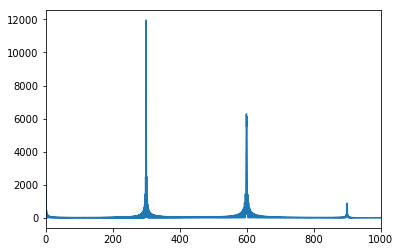

In [159]:
plt.plot(frq, np.abs(rfft))
plt.xlim(0, 1000)